# Homework 1
Ondřej Hladůvka

### Task 1
Assume that the Affine cipher is implemented in Z97, not in Z26. (Imagine that we just extended
alphabet, added a set of special symbols. But the first 26 letters stay the same as in English alphabet.)

1. Write down encryption and decryption functions for this modification of Affine cipher.

In [20]:
#For modulo 26:
#Enc(pt_char) = a · pt_char + b( mod 26)
#Dec(ct_char) = a^−1 · (ct_char − b)( mod 26)
#where a^−1 is multiplicative inverse of a modulo 26

# for other modulos we just need to find multiplicative inverses in it
import math

# multiplicative inverse of a modulo 97
def inverse_mod97(i : int):
    return pow(i, -1, 97)

def encrypt_mod97(pt_char : int, a_k : int, b_k : int):
    return (a_k * pt_char + b_k) % 97

def decrypt_mod97(ct_char : int, a_k : int, b_k : int):
    return (inverse_mod97(a_k) * (ct_char - b)) % 97

2. What is the number of possible keys?

In [21]:
from math import gcd

# Euler's totient function
def phi(n):
    amount = 0        
    for k in range(1, n + 1):
        if gcd(n, k) == 1:
            amount += 1
    return amount

print("Possible independent multiplicative key parts:", phi(97))
print("Possible independent additive key parts:", 97)
print("All possible keys:", phi(97) * 97)

Possible independent multiplicative key parts: 96
Possible independent additive key parts: 97
All possible keys: 9312


3. Suppose that modulus p = 97 is public. Malicious Eve intercepts 3-letter ciphertext c = 28 83 43.
Assume that Eve also knows corresponding plaintext m = D O G. Find out the encryption key,
decryption key and use it to decrypt message c
′
= 78 23 33 (The result should be 3-letter airport
code).

In [29]:
mod = 97
ct1 = [28, 83, 43]
pt1 = [ord(x) - ord('A') for x in ['D', 'O', 'G']] # convert to ints
pt2 = ""
ct2 = [78, 23, 33]


for p, c in zip(pt1, ct1):
    print(f"{c} = a * {p} + b (mod {mod})")

# solve a, b
print("\nwe will subtract the first equation from the second to cancel out b")
print(f"{ct1[1]} - {ct1[0]} = a * {pt1[1]} - (a * {pt1[0]}) (mod {mod})")

left = ct1[1] - ct1[0]
right = pt1[1] - pt1[0]
print(f"{left} = a * {right} (mod {mod})")

right_inv = inverse_mod97(right)
print(f"\nmultiply by the inverse to get a -> {right}^-1 (mod {mod}) == {right_inv}")
a = (left * right_inv) % mod
print(f"{a} = {(right * right_inv) % mod} * a (mod {mod})")
print(f"a = {a}")

print("\nget b from the first equation")
print(f"{ct1[0]} = {a} * {pt1[0]} + b (mod {mod})")
right = a * pt1[0]
b = ct1[0] - right
print(f"{b} = {a * pt1[0] - right} + b (mod {mod})")
print(f"b = {b}")

print("\ncheck correctness against third equation")
print(f"{ct1[2]} = {a} * {pt1[2]} + {b} (mod {mod})")
print(f"{ct1[2]} = {a * pt1[2] + b} (mod {mod})")

# decrypt ct2
print("\nwe can now decrypt pt2:")
for ct in ct2:
    pt = decrypt_mod97(ct, a, b)
    pt2 += chr(ord('A') + pt)
    print(f"Dec({ct}) = {pt} => {chr(ord('A') + pt)}")

# resolve airport code
import requests 
response = requests.get("https://airport-data.com/api/ap_info.json?iata=" + pt2)
data = response.json()
if response.status_code == 200:
    if data['icao'] is None:
        print("Airport not found")
    else:
        print(f"Airport is {data['name']} in {data['country']}")
else:
    print("api error, cant resolve airport code :(")

28 = a * 3 + b (mod 97)
83 = a * 14 + b (mod 97)
43 = a * 6 + b (mod 97)

we will subtract the first equation from the second to cancel out b
83 - 28 = a * 14 - (a * 3) (mod 97)
55 = a * 11 (mod 97)

multiply by the inverse to get a -> 11^-1 (mod 97) == 53
5 = 1 * a (mod 97)
a = 5

get b from the first equation
28 = 5 * 3 + b (mod 97)
13 = 0 + b (mod 97)
b = 13

check correctness against third equation
43 = 5 * 6 + 13 (mod 97)
43 = 43 (mod 97)

we can now decrypt pt2:
Dec(78) = 13 => N
Dec(23) = 2 => C
Dec(33) = 4 => E
Airport is Nice Côte d'Azur Airport in France


### Task 2
This task is on constructing frequency diagrams:
- Find and write down paragraph of English plaintext. It should be at most 600 letters long.

In [32]:
plaintext = """
According to all known laws of aviation, there is no way a bee should be able to fly.
Its wings are too small to get its fat little body off the ground.
The bee, of course, flies anyway because bees don't care what humans think is impossible.
Yellow, black. Yellow, black. Yellow, black. Yellow, black.
Ooh, black and yellow!
Let's shake it up a little.
Barry! Breakfast is ready!
Coming!
Hang on a second.
Hello?
Barry?
Adam?
Can you believe this is happening?
I can't.
I'll pick you up.
Looking sharp.
Use the stairs, Your father paid good money for those.
Sorry. I'm excited.
Here's the graduate.
"""

- Construct frequency diagram for the chosen plaintext.

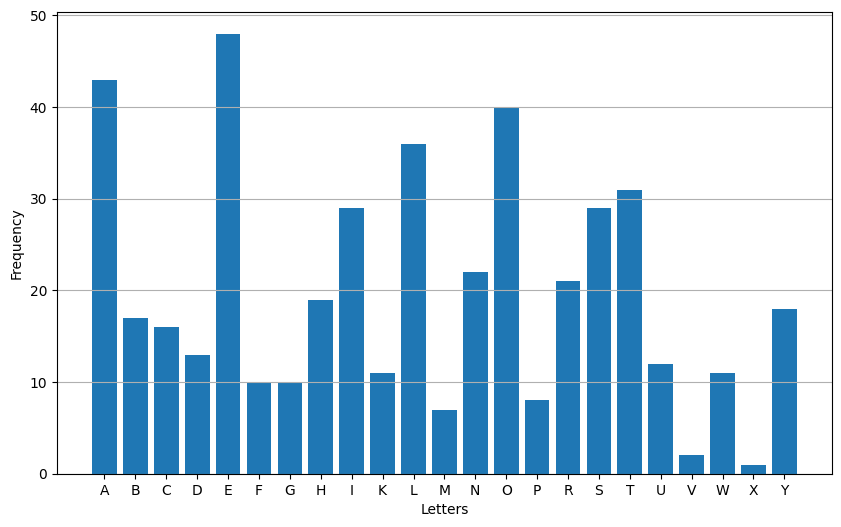

In [39]:
import matplotlib.pyplot as plt
from collections import Counter

# filter just letters and convert them to uppercase
plaintext = ''.join(filter(str.isalpha, plaintext.upper()))

# plot frequency using matplotlib
def freq_plot(text : str) :
    letter_counts = Counter(text)
    letters = sorted(letter_counts.keys())
    frequencies = [letter_counts[letter] for letter in letters]

    plt.figure(figsize=(10, 6))
    plt.bar(letters, frequencies)
    plt.xlabel('Letters')
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()

freq_plot(plaintext)

- Encrypt your plaintext with shift cipher, permutation cipher, Vigenère cipher and construct frequency
diagrams for the corresponding ciphertexts. You may choose any suitable keys for the ciphers.

with shift key: 3
we will get cyphertext: ['D', 'F', 'F', 'R', 'U', 'G', 'L', 'Q', 'J', 'W']...
with frequency diagram:


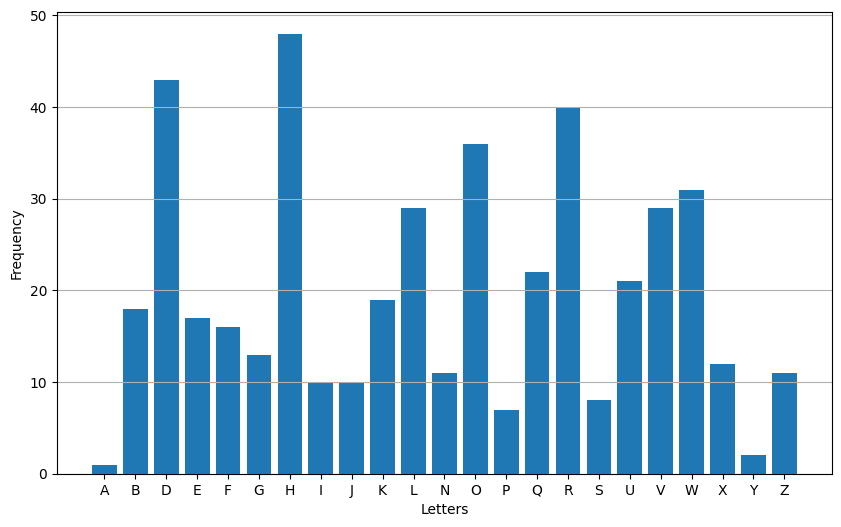

we can clearly see the same patterns just shifted by 3

with permutation key: [103, 159, 290, 338, 346, 115, 49, 88, 363, 378]...
we will get cyphertext: ['E', 'C', 'T', 'C', 'T', 'R', 'I', 'G', 'D', 'Y']...
with frequency diagram:


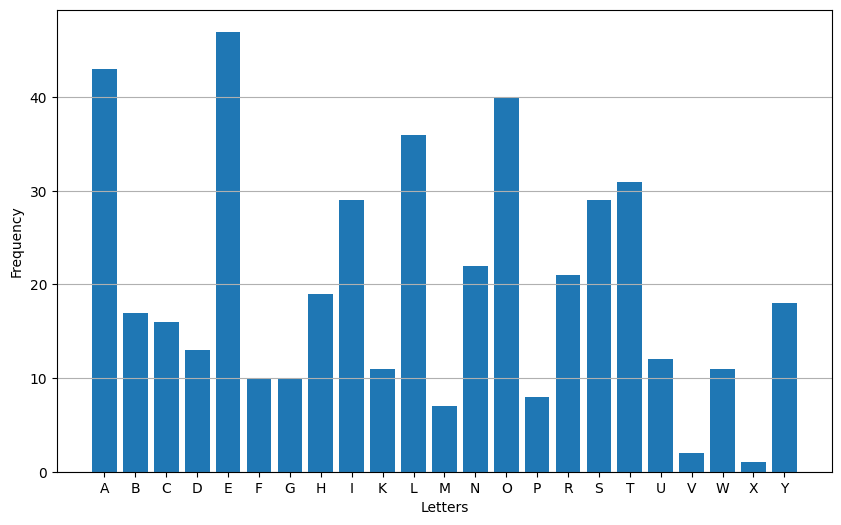

we can see there is no change compared to the plaintext diagram as permutation does not create any confusion

with shift key: ['R', 'F', 'I', 'Q', 'S', 'Z', 'K', 'U', 'T', 'S']...
we will get cyphertext: ['R', 'H', 'K', 'E', 'J', 'C', 'S', 'H', 'Z', 'L']...
with frequency diagram:


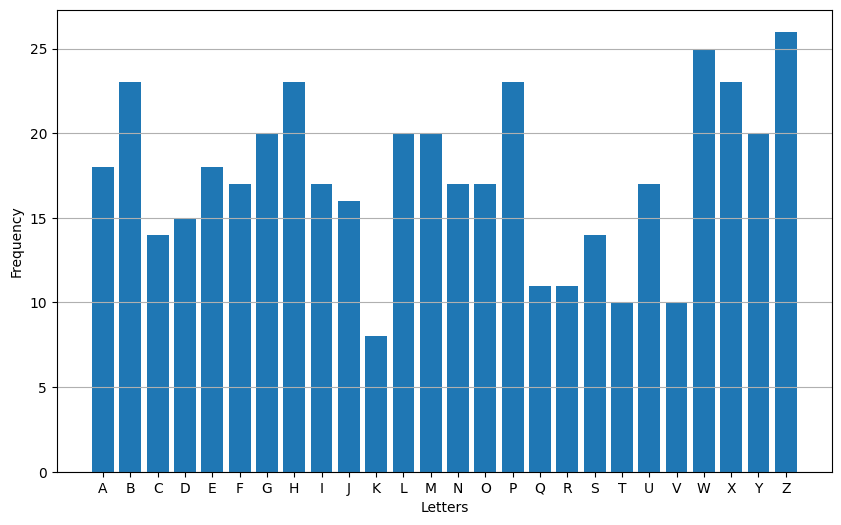

we can see no correlation of ctyphertext diagram to plaintext as vigenere creates great confusion
as plaintext gets longer vigenere with random key converges to uniform distribution among all letters


In [70]:
import random
import string

## encryption functions
def shift_enc(pt : str, key : int):
    return [chr((ord(letter) - ord('A') + key) % 26 + ord('A') ) for letter in pt]

def perm_enc(pt : str, key : list[int]):
    ret = ["a" for i in range(0, len(pt)-1)]
    for from_idx, to_idx in enumerate(key):
        ret[to_idx] = pt[from_idx]
    return ret

def vigenere_enc(pt : str, key : list[int]):
    pt_int  = [ord(i) - ord('A') for i in pt]
    key_int = [ord(i) - ord('A') for i in key]
    
    ct_int = [(char + key) % 26 for char, key in zip(pt_int, key_int)]
    ct     = [chr(i + ord('A')) for i in ct_int]
    return ct

## keygen functions
# generate random shift
def keygen_shift():
    return random.randint(1,26)

# generate random permutation from 0 upto len
def keygen_perm(len : int):
    ret = [ i for i in range(0, len-1)]
    random.shuffle(ret)
    return ret

# generate len random letters
def keygen_vigenere(len : int):
    return [random.choice(string.ascii_uppercase) for i in range(0, len-1)]

# shift cypher
shift_k = keygen_shift()
shift_ct = shift_enc(plaintext, shift_k)
print(f"with shift key: {shift_k}")
print(f"we will get cyphertext: {shift_ct[:10]}...")
print(f"with frequency diagram:")
freq_plot(shift_ct)
print(f"we can clearly see the same patterns just shifted by {shift_k}\n")

# permutation cypher
perm_k = keygen_perm(len(plaintext))
perm_ct = perm_enc(plaintext, perm_k)
print(f"with permutation key: {perm_k[:10]}...")
print(f"we will get cyphertext: {perm_ct[:10]}...")
print(f"with frequency diagram:")
freq_plot(perm_ct)
print(f"we can see there is no change compared to the plaintext diagram as permutation does not create any confusion\n")

# vigenere cypher
vig_k = keygen_vigenere(len(plaintext))
vig_ct = vigenere_enc(plaintext, vig_k)
print(f"with shift key: {vig_k[:10]}...")
print(f"we will get cyphertext: {vig_ct[:10]}...")
print(f"with frequency diagram:")
freq_plot(vig_ct)
print(f"we can see no correlation of ctyphertext diagram to plaintext as vigenere creates great confusion")
print(f"as plaintext gets longer vigenere with random key converges to uniform distribution among all letters")


- Analyse constructed diagrams and explain which properties help you to identify which encryption
scheme was used.

- shift cypher TODO dodat kecy

### Task 3
Assume you have used a time machine and you are back at Julius Caesar’s era. Now, you need
to help Julius Caesar in selecting better ways for sending secret messages to his military units. You may
select among the ones that have been discussed during this course up to Week 3 included (shift cipher,
substitution cipher, permutation cipher, affine cipher, Vigenère cipher, OTP). Provide an explanation for your
choice.

### Task 4
Suppose you intercepted the following ciphertext c = 00010010 00000111 11101010. You know
that a 3-letter word was encrypted using one-time pad (to convert letters to binary strings ASCII table was
used). Can you bruteforce possible keys and learn the message that was encrypted?

In [73]:
ct = [0b00010010, 0b00000111, 0b11101010]

def break_letter(idx : int)

[18, 7, 234]
